In [1]:
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn")

from sklearn.model_selection import train_test_split

In [2]:
train = pd.DataFrame({'channels':[], 'expNum':[], 'y':[]})
test = pd.DataFrame({'channels':[], 'expNum':[], 'sample_num':[]})

for exp_num in range(5):
    for csv_dir in ['non-target', 'target', 'test']:
        for path in glob(r'dataset\{}\{}\*.csv'.format(exp_num, csv_dir)):
            channels_df = pd.read_csv(path, names =['Fp1', 'Fp2', 'F3', 'AFz', 'F4', 'T7', 'Cz', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2'])
            
            if csv_dir == 'non-target' or csv_dir == 'target':
                train = train.append({'channels':channels_df, 'expNum':exp_num, 'y':csv_dir}, ignore_index=True)
            elif csv_dir == 'test':
                sample_num = int(path.split('\\')[-1].split('.')[0])
                test = test.append({'channels':channels_df, 'expNum':exp_num, 'sample_num':sample_num}, ignore_index=True)

In [3]:
train.expNum = train.expNum.astype(int)
test.expNum = test.expNum.astype(int)
test.sample_num = test.sample_num.astype(int)
train.y = train.y.astype('category').cat.codes

print("Train")
display(train)
print("Test")
display(test)

Train


,channels,expNum,y
0,Fp1 Fp2 F3 AFz ...,0,0
1,Fp1 Fp2 F3 AFz ...,0,0
2,Fp1 Fp2 F3 AFz ...,0,0
3,Fp1 Fp2 F3 AFz ...,0,0
4,Fp1 Fp2 F3 AFz ...,0,0
...,...,...,...
2518,Fp1 Fp2 F3 AFz ...,4,1
2519,Fp1 Fp2 F3 AFz ...,4,1
2520,Fp1 Fp2 F3 AFz ...,4,1
2521,Fp1 Fp2 F3 AF...,4,1


Test


,channels,expNum,sample_num
0,Fp1 Fp2 F3 AFz ...,0,0
1,Fp1 Fp2 F3 AFz ...,0,1
2,Fp1 Fp2 F3 AFz ...,0,10
3,Fp1 Fp2 F3 AFz ...,0,11
4,Fp1 Fp2 F3 AFz...,0,12
...,...,...,...
628,Fp1 Fp2 F3 AFz ...,4,628
629,Fp1 Fp2 F3 AFz ...,4,629
630,Fp1 Fp2 F3 AFz ...,4,630
631,Fp1 Fp2 F3 AFz ...,4,631


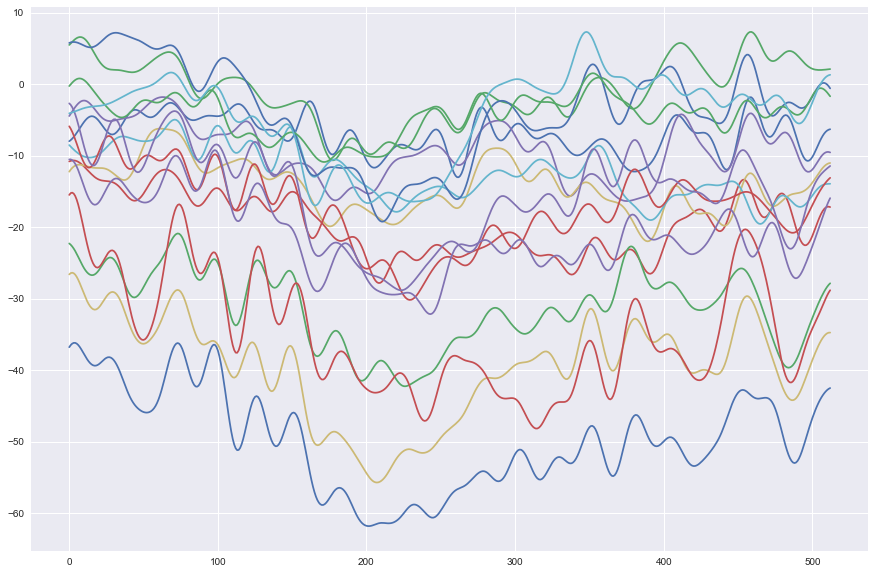

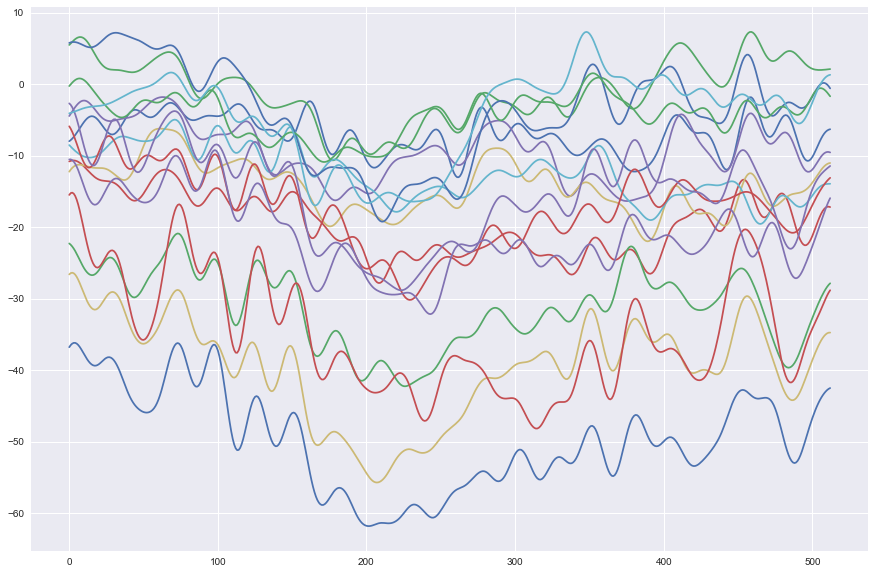

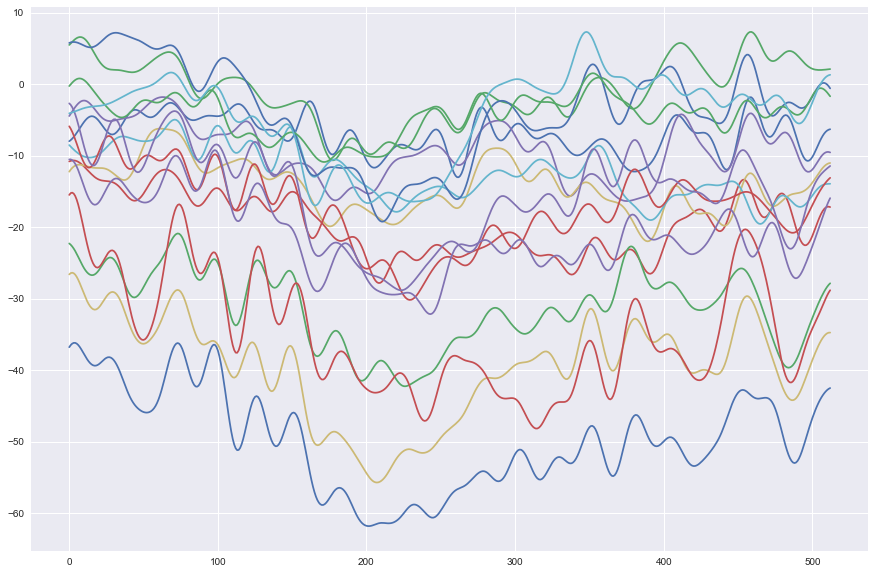

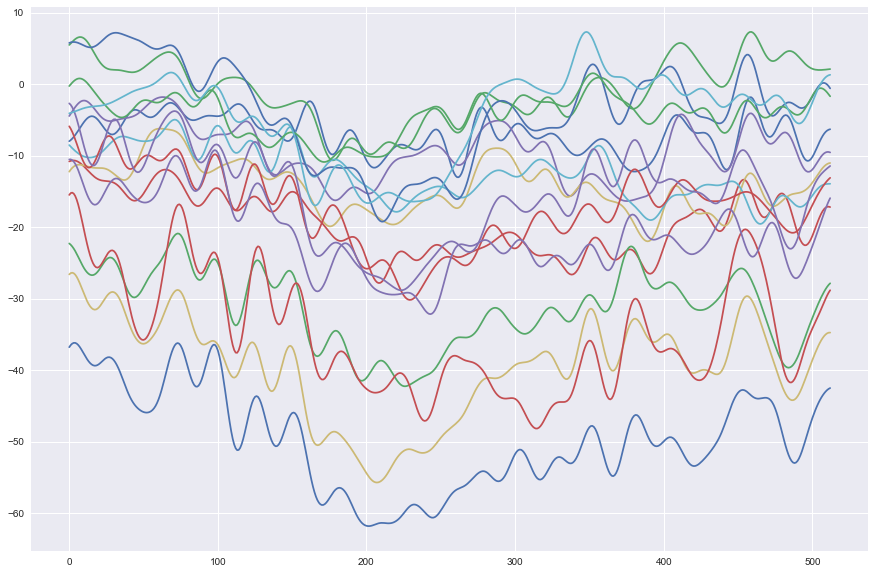

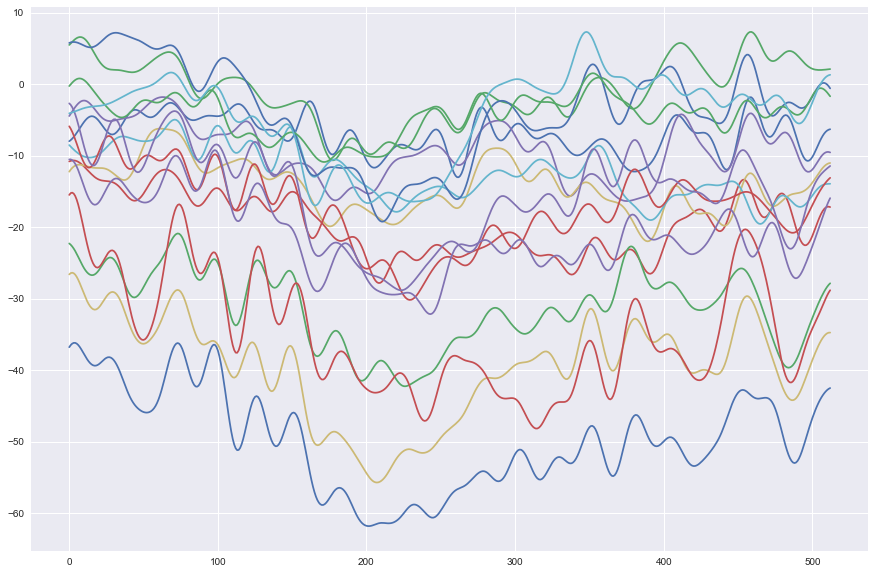

In [4]:
freq = 512 # Гц
    
for i in range(5): 
    plt.figure(figsize=(15, 10))
    plt.plot(train.iloc[0].channels)

In [101]:
# train.channels = train.channels.map(lambda x: x.to_numpy().flatten())
# train = pd.DataFrame(list(train.channels)).join(train.drop('channels', axis=1))

# test.channels = test.channels.map(lambda x: x.to_numpy().flatten())
# test = pd.DataFrame(list(test.channels)).join(test.drop('channels', axis=1))

data = train

train_x, test_x, train_y, test_y = train_test_split(data.drop(['y', 'expNum'], axis=1), data.y, test_size=0.05)

In [102]:
myTrain = train_x.join(train_y)

print("БЫЛО:")
print("Класс 0: ", myTrain.y.value_counts()[0] / len(myTrain))
print("Класс 1: ", myTrain.y.value_counts()[1] / len(myTrain))
print()
print(myTrain.y.value_counts())
print('\n\n')
no = myTrain[myTrain.y == 0]
yes = myTrain[myTrain.y == 1]

bdf = pd.concat([no, yes, yes, yes, yes, yes[::2], yes[::3]])
print("СТАЛО: ")
print("Класс 0: ", bdf.y.value_counts()[0] / len(bdf))
print("Класс 1: ", bdf.y.value_counts()[1] / len(bdf))
print()
print(bdf.y.value_counts())

myTrain = bdf

БЫЛО:
Класс 0:  0.8318030050083473
Класс 1:  0.16819699499165275

0    1993
1     403
Name: y, dtype: int64



СТАЛО: 
Класс 0:  0.5055809233891426
Класс 1:  0.49441907661085743

0    1993
1    1949
Name: y, dtype: int64


In [103]:
myTest =  test_x.join(test_y)

print("БЫЛО:")
print("Класс 0: ", myTest.y.value_counts()[0] / len(myTest))
print("Класс 1: ", myTest.y.value_counts()[1] / len(myTest))
print()
print(myTest.y.value_counts())
print('\n\n')
no = myTest[myTest.y == 0]
yes = myTest[myTest.y == 1]

bdf = pd.concat([no, yes, yes, yes, yes, yes, yes[::3]])
print("СТАЛО: ")
print("Класс 0: ", bdf.y.value_counts()[0] / len(bdf))
print("Класс 1: ", bdf.y.value_counts()[1] / len(bdf))
print()
print(bdf.y.value_counts())

myTest = bdf

БЫЛО:
Класс 0:  0.8582677165354331
Класс 1:  0.14173228346456693

0    109
1     18
Name: y, dtype: int64



СТАЛО: 
Класс 0:  0.5317073170731708
Класс 1:  0.4682926829268293

0    109
1     96
Name: y, dtype: int64


In [104]:
train_x, test_x, train_y, test_y = myTrain.drop('y', axis=1), myTest.drop('y', axis=1), myTrain.y, myTest.y

In [105]:
# from catboost import CatBoostClassifier, Pool

# train_pool = Pool(train_x, train_y)
# test_pool = Pool(test_x, test_y)
# model = CatBoostClassifier(eval_metric='Accuracy', custom_metric='F1', 
#                            iterations=300, learning_rate=0.01)

# model.fit(train_pool, eval_set=test_pool, plot=True, verbose=False)

# model.save_model('model_best')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [115]:
model = CatBoostClassifier()

model.load_model('model_best')

pred = test[model.predict(test.drop(['expNum', 'sample_num'], axis=1)).astype(bool)].sample_num

print(' '.join(list(map(str, pred))))

1 12 13 14 34 44 45 46 49 6 63 64 70 74 76 81 105 113 115 118 129 138 141 143 144 154 158 164 166 185 186 189 89 94 97 98 191 192 193 195 198 200 208 211 216 223 227 228 230 232 233 235 248 260 264 267 270 282 287 299 302 305 307 308 316 326 332 336 342 354 361 382 386 387 389 392 393 403 410 417 439 448 449 450 458 467 480 484 496 517 520 521 522 530 539 545 550 552 559 561 576 589 592 595 601 604 607 619 621 623
